### 00_Install VOLOv5

In [1]:
%pwd

'/home/jhj/dev_ws/09_YOLO/src'

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16614, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 16614 (delta 51), reused 58 (delta 27), pack-reused 16522
Receiving objects: 100% (16614/16614), 15.09 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (11410/11410), done.


In [3]:
%cd yolov5/

/home/jhj/dev_ws/09_YOLO/src/yolov5


/home/jhj/venv/YOLOv5_venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
%pip install -r requirements.txt

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.2 MB/s eta 0:00:00
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp310-cp310-man

In [4]:
%pwd

'/home/jhj/dev_ws/09_YOLO/src/yolov5'

### 01_Predict

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images --name exp2 --exist-ok

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp2, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)

100%|██████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 74.4MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /home/jhj/dev_ws/09_YOLO/src/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 37.7ms
image 2/2 /home/jhj/dev_ws/09_YOLO/src/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 31.5ms
Speed: 0.3ms pre-process, 34.6ms inference, 151.0ms NMS

### 02_Predict result

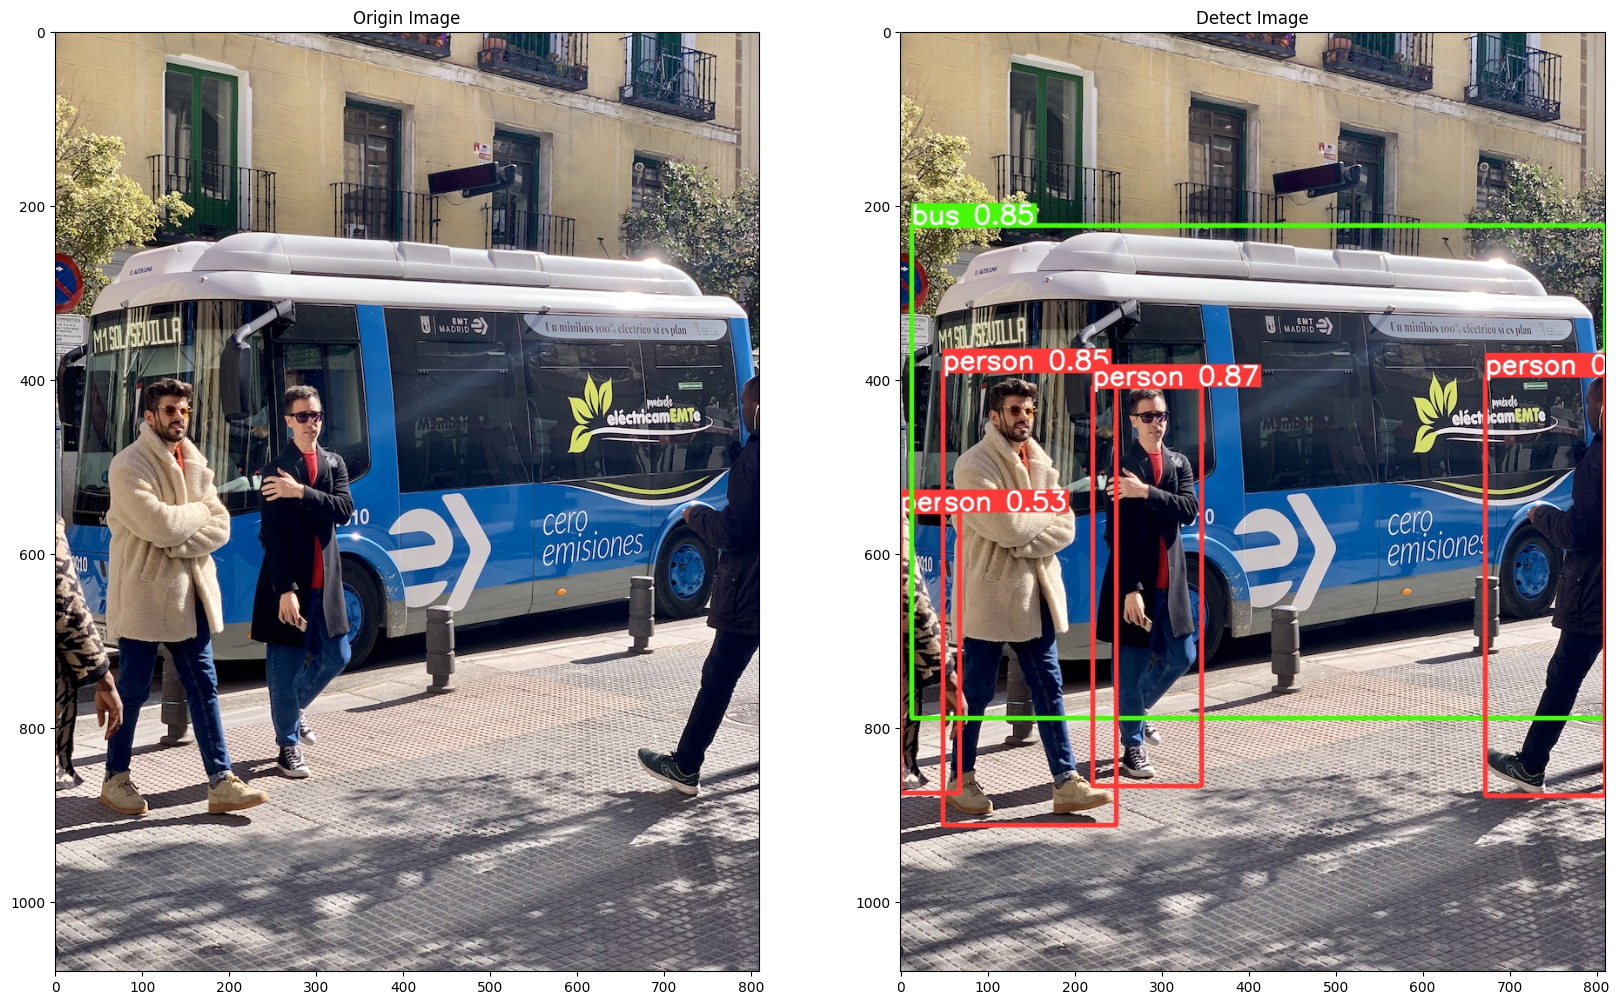

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
# object detection을 수행할 이미지
origin_img = Image.open('./data/images/bus.jpg')
# object detection을 완료한 이미지
detect_img = Image.open('./runs/detect/exp2/bus.jpg')
# matplotlib을 이용한 2개 이상 이미지 출력
fig, ax = plt.subplots(ncols=2, figsize=(20, 15))
ax[0].imshow(origin_img)
ax[0].set_title('Origin Image')
ax[1].imshow(detect_img)
ax[1].set_title('Detect Image')
plt.show()

### 03_Train

In [7]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2060 (UUID: GPU-97b5a118-e7dd-1cbb-2c69-414140f2a7cc)


In [8]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls

### 04_Train result

error case

In [9]:
# 학습 지표 그래프
from PIL import Image
train_log = Image.open('./runs/train/exp/results.png')
# 이미지 원본 비율 유지하면서 사이즈 조정
long_edge_size = 800
resized_train_log = train_log.resize((long_edge_size, round(long_edge_size *
train_log.size[1] / train_log.size[0])), resample=Image.LANCZOS)
resized_train_log.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/jhj/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


fixed; gpt

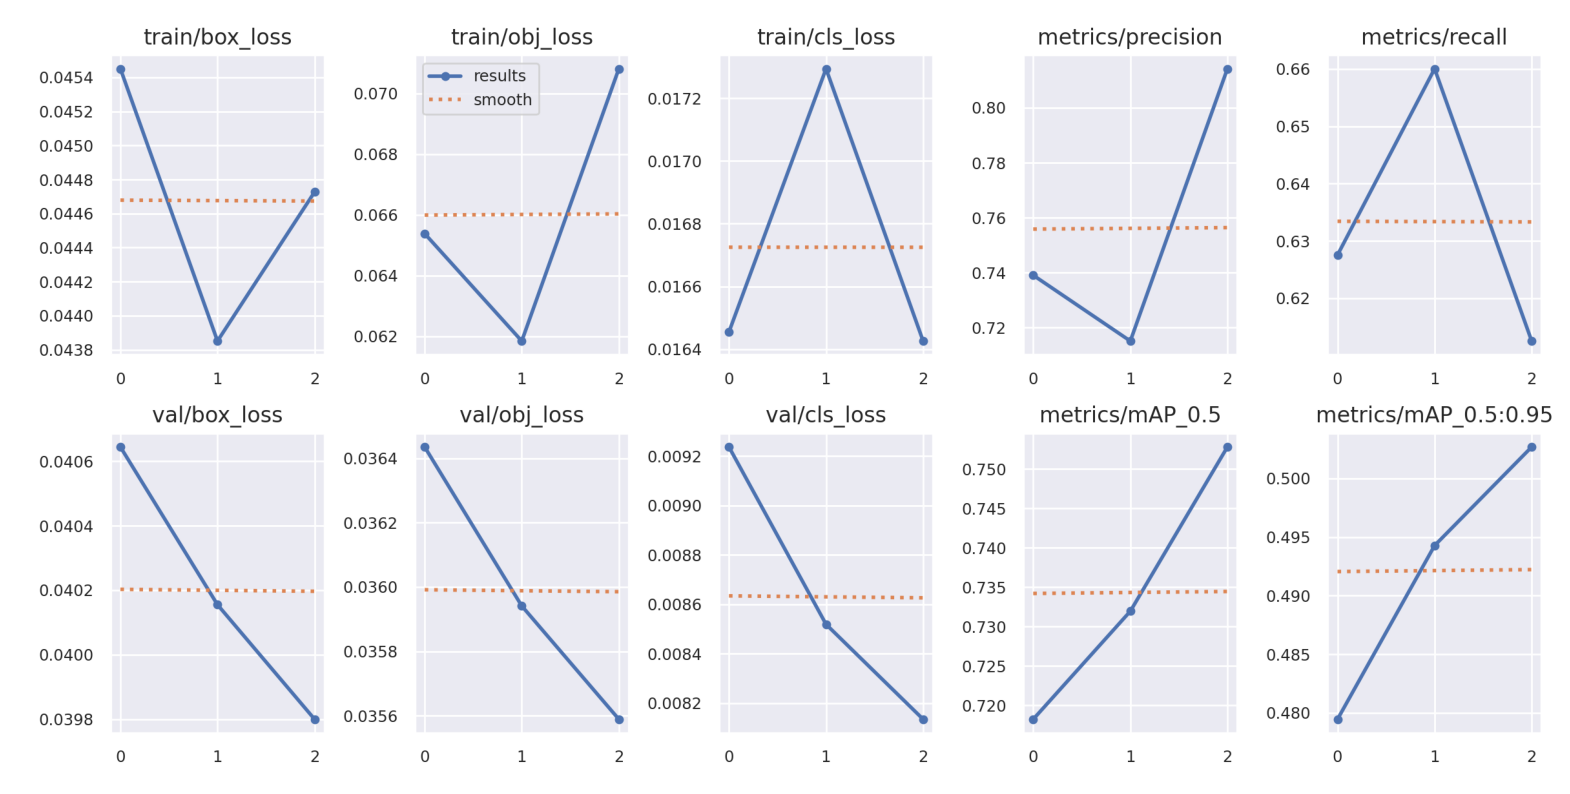

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 열기
img = mpimg.imread('./runs/train/exp/results.png')

# 이미지 크기 조정
long_edge_size = 2000
aspect_ratio = img.shape[1] / img.shape[0]
resized_img = plt.figure(figsize=(long_edge_size / 100, long_edge_size / 100 * aspect_ratio))
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()